# Student Performance Prediction - EDA

In [19]:
# Import python libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Data Ingestion

In [20]:
df=pd.read_csv('data/data.csv')

### Data Profiling

In [21]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [22]:
df.tail()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [23]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [24]:
df.shape

(1000, 8)

In [25]:
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [26]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Handling Duplicates

In [28]:
df.duplicated().sum()

np.int64(0)

* No Duplicates Found

### Handling Missing Values

In [29]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

* No Missing Values Found

### Feature Engineering

In [30]:
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['average_score']=df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


### Data Visualization

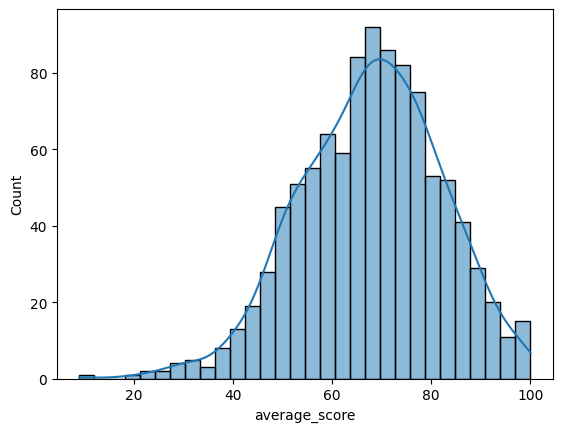

In [32]:
sns.histplot(x=df['average_score'],bins=30,kde=True)
plt.show()

<Axes: xlabel='writing_score', ylabel='Count'>

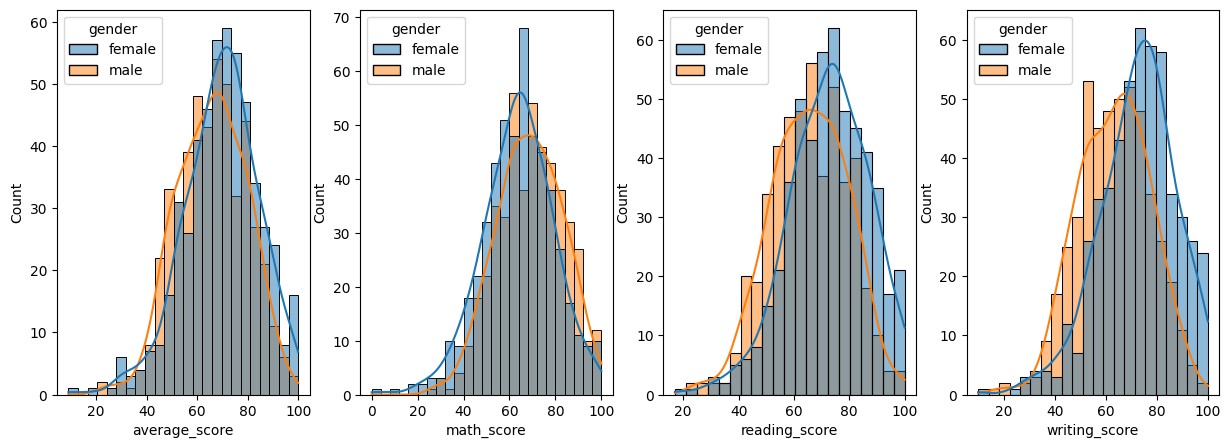

In [38]:
plt.subplots(1,4,figsize=(15,5))
plt.subplot(141)
sns.histplot(x=df['average_score'],kde=True,hue=df['gender'])
plt.subplot(142)
sns.histplot(x=df['math_score'],kde=True,hue=df['gender'])
plt.subplot(143)
sns.histplot(x=df['reading_score'],kde=True,hue=df['gender'])
plt.subplot(144)
sns.histplot(x=df['writing_score'],kde=True,hue=df['gender'])

<Axes: xlabel='writing_score', ylabel='Count'>

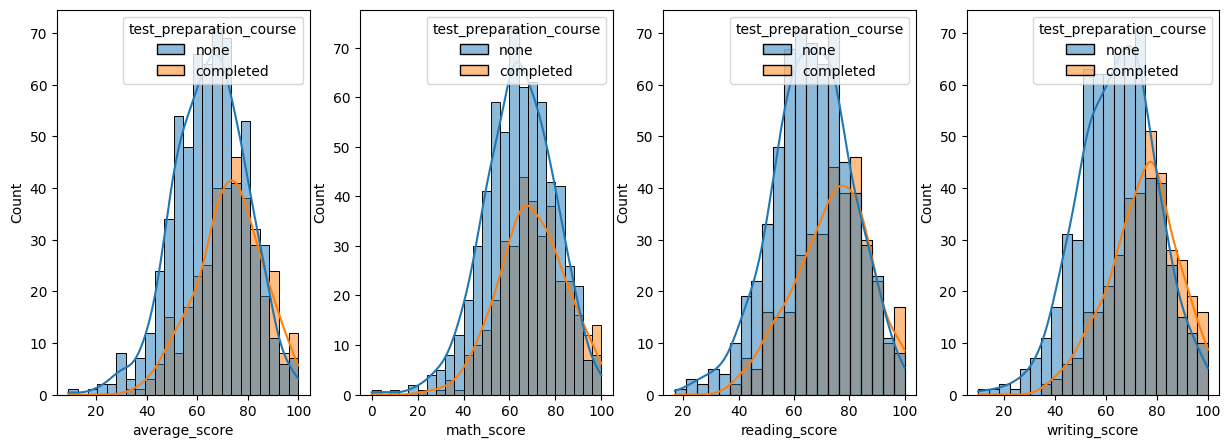

In [39]:
plt.subplots(1,4,figsize=(15,5))
plt.subplot(141)
sns.histplot(x=df['average_score'],kde=True,hue=df['test_preparation_course'])
plt.subplot(142)
sns.histplot(x=df['math_score'],kde=True,hue=df['test_preparation_course'])
plt.subplot(143)
sns.histplot(x=df['reading_score'],kde=True,hue=df['test_preparation_course'])
plt.subplot(144)
sns.histplot(x=df['writing_score'],kde=True,hue=df['test_preparation_course'])

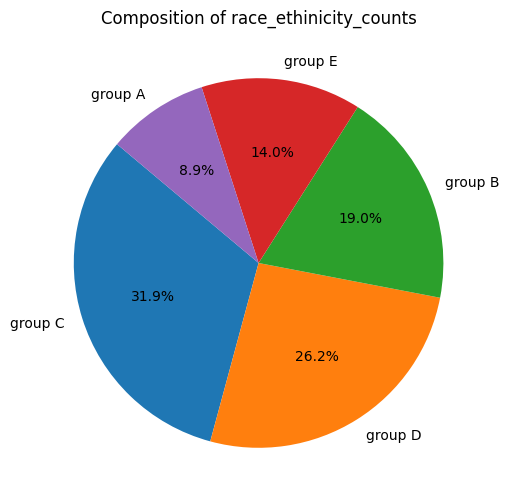

In [41]:
# Count the occurrences of each category
race_ethinicity_counts = df['race_ethnicity'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(race_ethinicity_counts, labels=race_ethinicity_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Composition of race_ethinicity_counts')
plt.show()

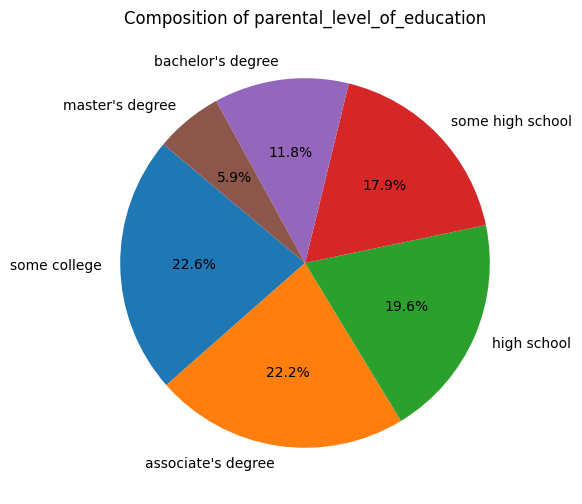

In [42]:
# Count the occurrences of each category
parental_level_of_education_counts = df['parental_level_of_education'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(parental_level_of_education_counts, labels=parental_level_of_education_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Composition of parental_level_of_education')
plt.show()